In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import joblib

In [48]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving personality_dataset.csv to personality_dataset (1).csv
User uploaded file "personality_dataset (1).csv" with length 137706 bytes


In [49]:
import pandas as pd

df = pd.read_csv("/content/personality_dataset.csv")

In [50]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [51]:
df.shape

(5000, 8)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [53]:
df.columns.tolist()

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

In [54]:

df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.969000,4.995200,3.523400,7.253200,4.759800
std,3.033922,2.862449,2.088618,4.045783,2.780369
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,5.000000,3.000000
50%,5.000000,5.000000,4.000000,7.000000,5.000000
75%,7.000000,7.000000,5.000000,10.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [55]:
category_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Category columns:", category_columns)
print("Numerical columns:", numerical_columns)

Category columns: ['Stage_fear', 'Drained_after_socializing', 'Personality']
Numerical columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


In [56]:
# Class distribution
print('\nPersonality Distribution:')
print(df['Personality'].value_counts(normalize=True))


Personality Distribution:
Personality
Introvert    0.5004
Extrovert    0.4996
Name: proportion, dtype: float64


In [57]:
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 128


In [58]:
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


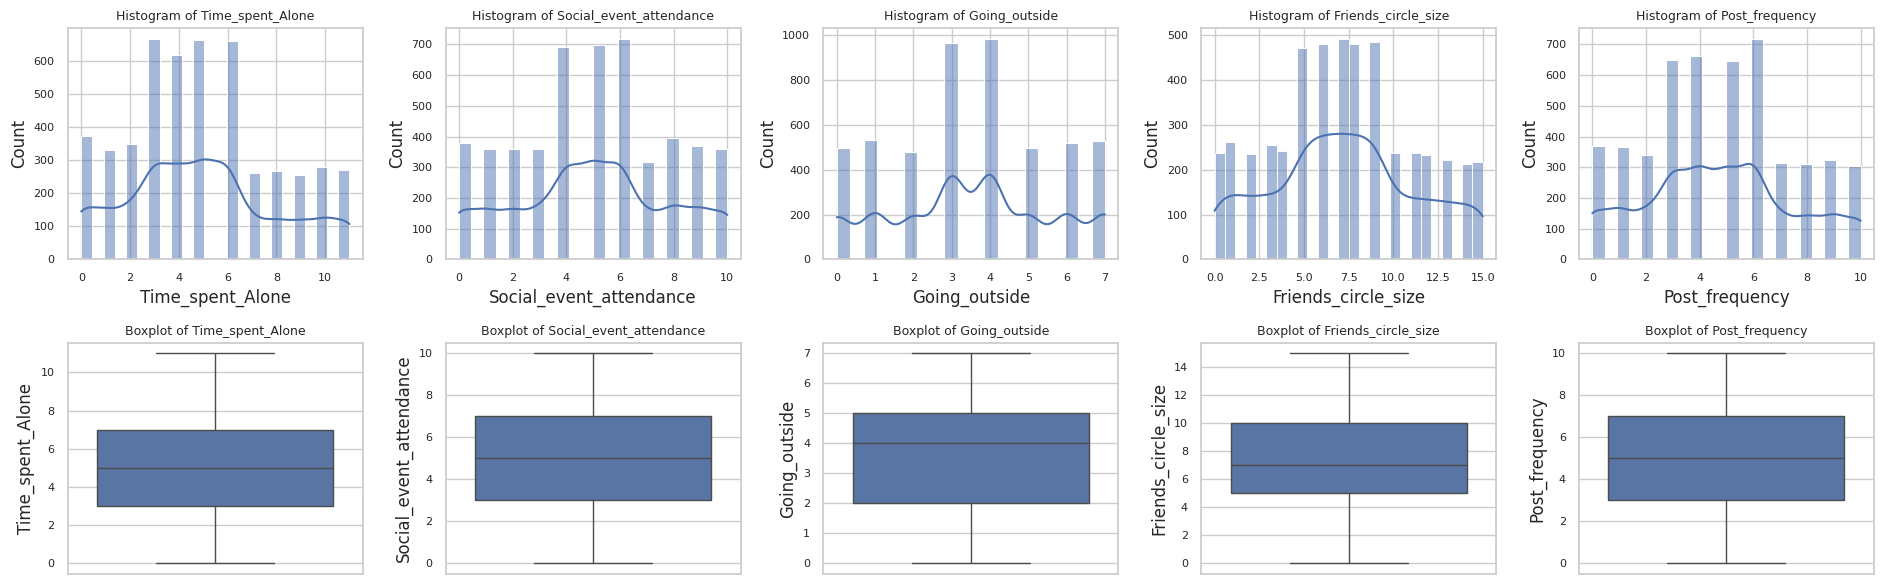

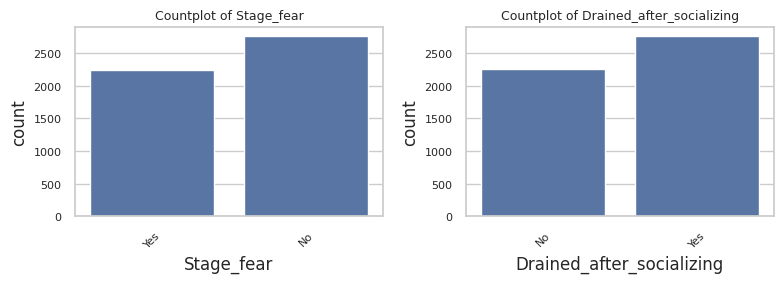

In [59]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                  'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(3.8 * len(numerical_cols), 6))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Histogram of {col}", fontsize=9)
    axes[0, i].tick_params(labelsize=8)

    sns.boxplot(y=df[col], ax=axes[1, i])
    axes[1, i].set_title(f"Boxplot of {col}", fontsize=9)
    axes[1, i].tick_params(labelsize=8)

plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(4 * len(categorical_cols), 3))

if len(categorical_cols) == 1:
    axes = [axes]

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot of {col}", fontsize=9)
    axes[i].tick_params(labelsize=8)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [60]:
 df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [61]:
df.duplicated().sum()

np.int64(128)

In [62]:
df.drop_duplicates(inplace=True)
print(f'Number of duplicate rows after dropping: {df.duplicated().sum()}')

Number of duplicate rows after dropping: 0


In [63]:
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [64]:
# Encode categorical variables
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
if 'Personality' in df.columns:
    df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                  'Friends_circle_size', 'Post_frequency']

# Feature scaling for numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.650524,1,0.352366,1.666604,0,1.662226,0.086717,1
1,-0.979705,0,1.052786,1.187989,0,-0.062665,1.164490,1
2,-1.308886,0,1.402995,0.230761,0,0.430161,-0.631798,1
3,0.995380,0,-1.748892,-1.683697,1,0.430161,-0.631798,0
4,0.007838,1,-0.698263,-1.683697,0,-1.294731,0.445975,0


Selected Features after Variance Threshold: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
Original feature count: 7
Reduced feature count (after PCA): 7


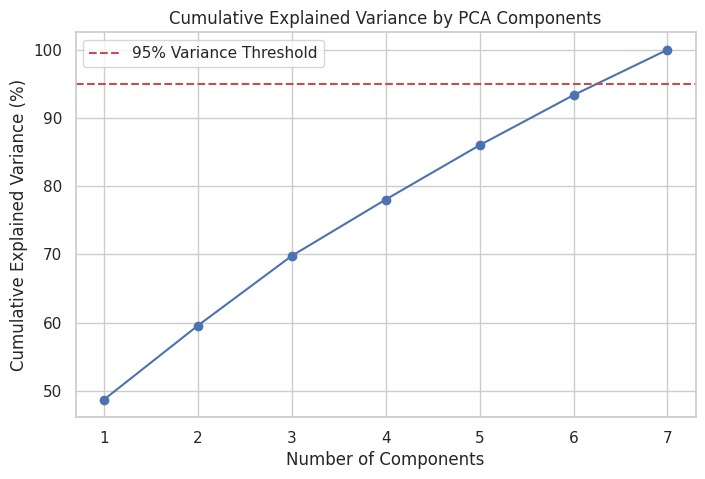

In [65]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


# Variance Threshold (Feature Selection)

selector = VarianceThreshold(threshold=0.01)  # remove near-constant features
X_selected = selector.fit_transform(X_train_scaled)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features after Variance Threshold: {list(selected_features)}")

# Update X_train_scaled and X_test_scaled to keep only selected features
X_train_selected = X_train_scaled[:, selector.get_support()]
X_test_selected = X_test_scaled[:, selector.get_support()]


#  PCA (Dimensionality Reduction)

pca = PCA(n_components=0.95)  # keep 95% variance
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

print(f"Original feature count: {X_train_selected.shape[1]}")
print(f"Reduced feature count (after PCA): {X_train_pca.shape[1]}")


#  PCA Visualization

explained_var_ratio = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var_ratio)+1), explained_var_ratio, marker='o')
plt.axhline(y=95, color='r', linestyle='--', label="95% Variance Threshold")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.legend()
plt.grid(True)
plt.show()

# Now use X_train_pca and X_test_pca for training models

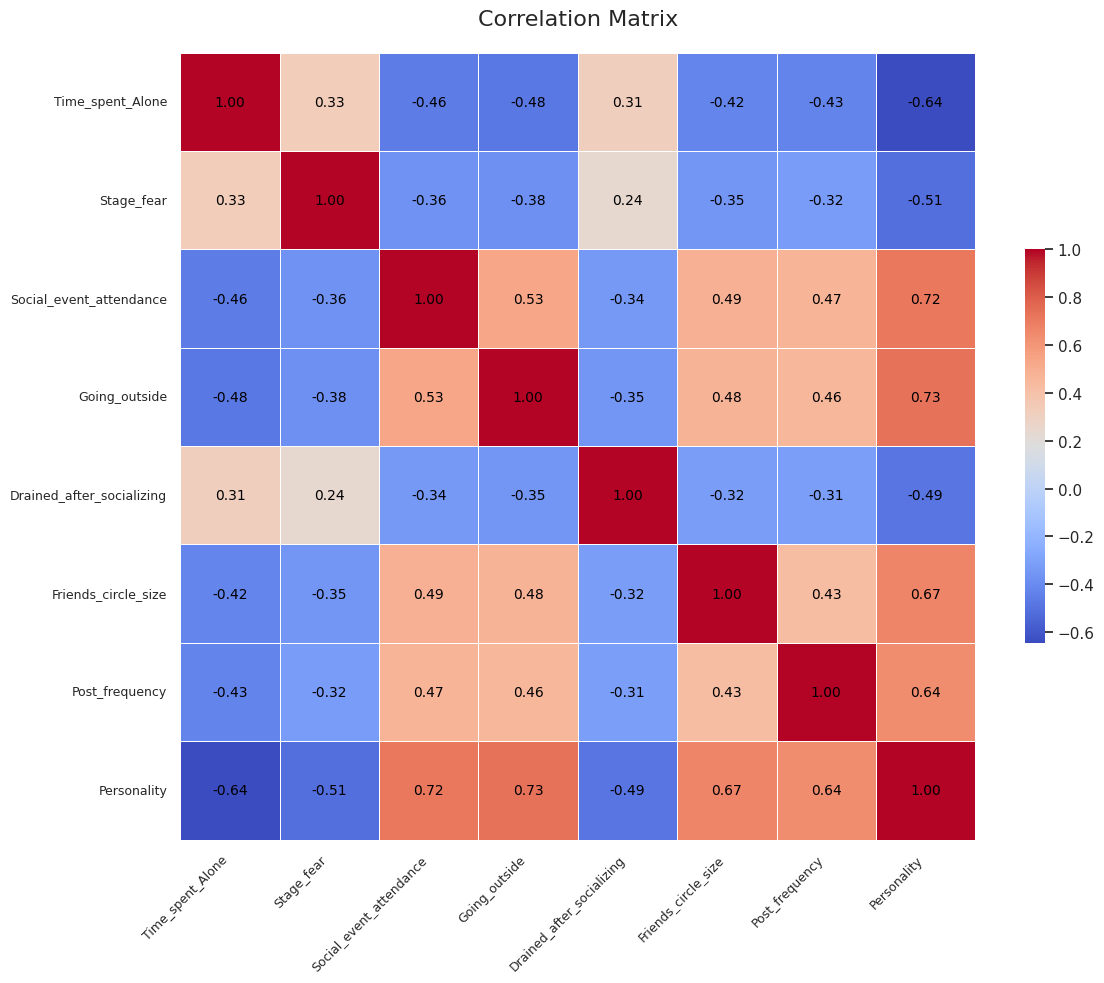

In [66]:
# Calculate correlation matrix
corr = df.corr()

fig_width = max(12, 0.6 * len(corr.columns))
fig_height = max(10, 0.6 * len(corr.columns))
plt.figure(figsize=(fig_width, fig_height))

# Plot heatmap
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5,annot_kws={"size": 10, "color": "black"},
    cbar_kws={'shrink': 0.5},
    square=False
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [67]:
corr.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.330468,-0.464719,-0.477727,0.313006,-0.420898,-0.430880,-0.644862
Stage_fear,0.330468,1.000000,-0.364403,-0.376468,0.237592,-0.350550,-0.324054,-0.512476
Social_event_attendance,-0.464719,-0.364403,1.000000,0.532727,-0.342321,0.488155,0.472706,0.716662
Going_outside,-0.477727,-0.376468,0.532727,1.000000,-0.351298,0.479430,0.459334,0.734146
Drained_after_socializing,0.313006,0.237592,-0.342321,-0.351298,1.000000,-0.321495,-0.312165,-0.488061


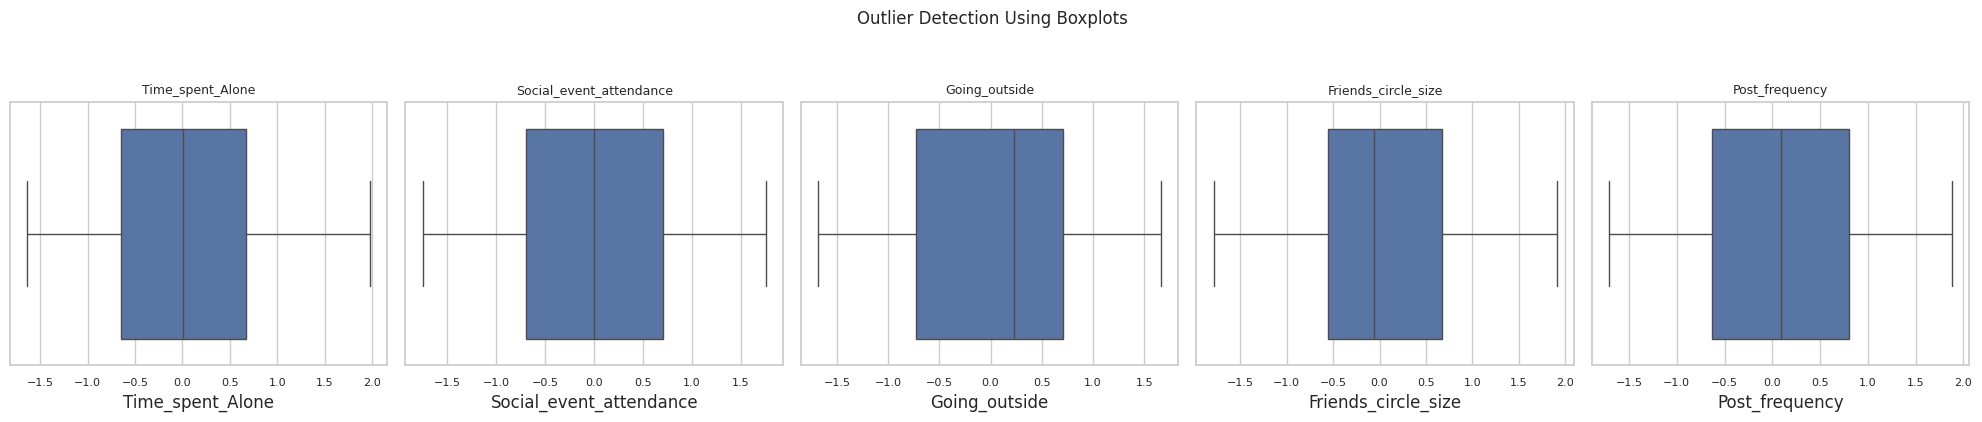

In [68]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(4 * len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=9)
    axes[i].tick_params(labelsize=8)

plt.suptitle("Outlier Detection Using Boxplots", fontsize=12, y=1.05)
plt.tight_layout()
plt.show()

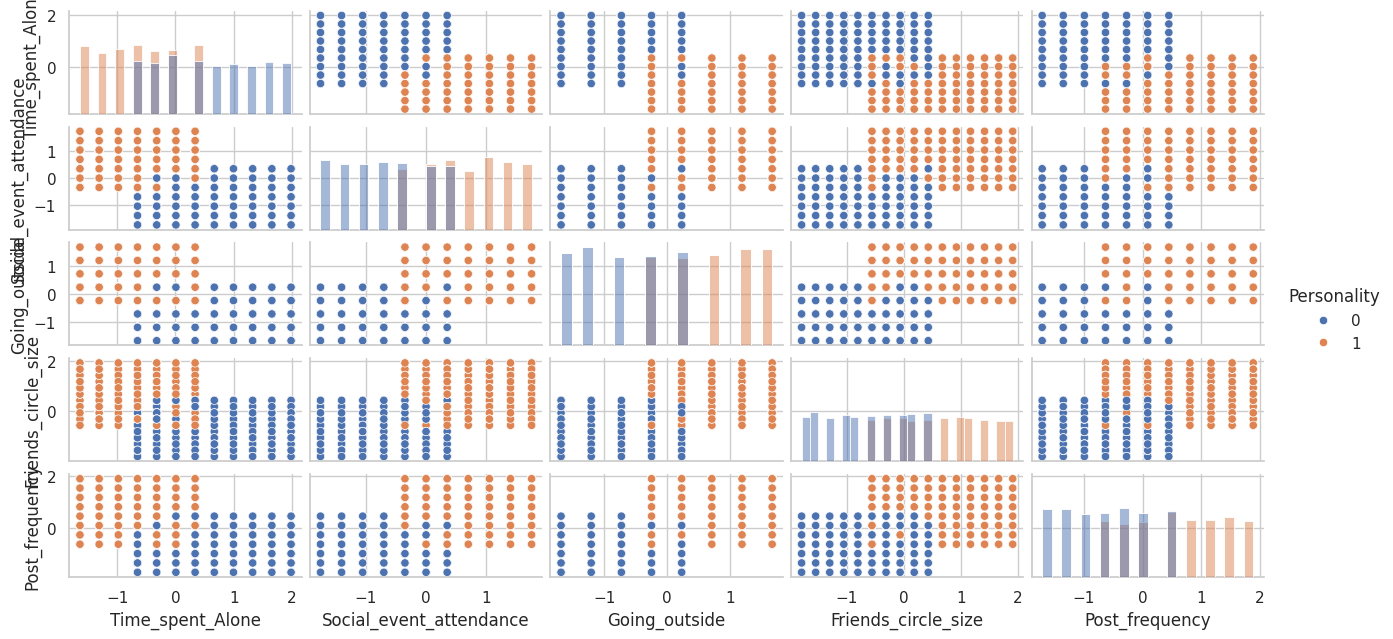

In [69]:
sns.pairplot(df[numerical_cols + ['Personality']], hue='Personality', diag_kind='hist', height=1.3, aspect=2)
plt.show()

Class Distribution (Count):
Personality
0    2440
1    2432
Name: count, dtype: int64

Class Distribution (Percentage):
Personality
0    50.082102
1    49.917898
Name: proportion, dtype: float64


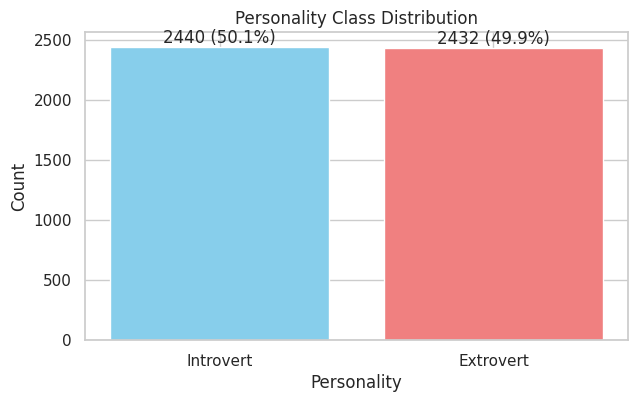

In [70]:
class_distribution = df['Personality'].value_counts()
total_samples = len(df)
class_percentage = df['Personality'].value_counts(normalize=True) * 100

print("Class Distribution (Count):")
print(class_distribution)
print("\nClass Distribution (Percentage):")
print(class_percentage)

plt.figure(figsize=(7, 4))
bars = plt.bar(class_distribution.index, class_distribution.values, color=['skyblue', 'lightcoral'])
plt.title('Personality Class Distribution')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Introvert', 'Extrovert'])

for bar, count, perc in zip(bars, class_distribution.values, class_percentage.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(count)} ({perc:.1f}%)',
             ha='center', va='bottom')

plt.show()

In [71]:
# Target col
X = df.drop('Personality', axis=1)
y = df['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3897, 7)
Shape of X_test: (975, 7)
Shape of y_train: (3897,)
Shape of y_test: (975,)


In [73]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Introvert", "Extrovert"]))

# Identify the best model
best_accuracy = 0
best_model_name = ""
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Logistic Regression Results:
Accuracy: 0.9877
Classification Report:
              precision    recall  f1-score   support

   Introvert       0.99      0.99      0.99       488
   Extrovert       0.99      0.99      0.99       487

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


Random Forest Results:
Accuracy: 0.9877
Classification Report:
              precision    recall  f1-score   support

   Introvert       0.99      0.99      0.99       488
   Extrovert       0.99      0.99      0.99       487

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


SVM Results:
Accuracy: 0.9867
Classification Report:
              precision    recall  f1-score   support

   Introvert       0.99      0.99      0.99       488
   Extrovert       0.99      0.99      0.99      

In [74]:
# Create train and validation split from training data
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [75]:
for name, model in models.items():
    model.fit(X_train_sub, y_train_sub)
    train_acc = accuracy_score(y_train_sub, model.predict(X_train_sub))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    print(f"\n{name} Accuracy:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Validation Accuracy: {val_acc:.4f}")


Logistic Regression Accuracy:
  Train Accuracy: 0.9891
  Validation Accuracy: 0.9821

Random Forest Accuracy:
  Train Accuracy: 1.0000
  Validation Accuracy: 0.9897

SVM Accuracy:
  Train Accuracy: 0.9904
  Validation Accuracy: 0.9808

Decision Tree Accuracy:
  Train Accuracy: 1.0000
  Validation Accuracy: 0.9808


In [76]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

In [77]:
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [78]:
best_models = {}
for name in base_models:
    print(f"\n Tuning {name}...")

    grid = GridSearchCV(
        estimator=base_models[name],
        param_grid=param_grids[name],
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train_sub, y_train_sub)
    best_models[name] = grid.best_estimator_
    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")


 Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9897

 Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9942

 Tuning SVM...
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9904

 Tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9904


In [79]:
for name, model in best_models.items():
    train_acc = model.score(X_train_sub, y_train_sub)
    val_acc = model.score(X_val, y_val)
    print(f"\n{name} After Tuning:")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")


Logistic Regression After Tuning:
Train Accuracy: 0.9897
Validation Accuracy: 0.9846

Random Forest After Tuning:
Train Accuracy: 0.9984
Validation Accuracy: 0.9897

SVM After Tuning:
Train Accuracy: 0.9904
Validation Accuracy: 0.9833

Decision Tree After Tuning:
Train Accuracy: 0.9904
Validation Accuracy: 0.9910


In [80]:
final_model = best_models["Logistic Regression"]
test_acc = final_model.score(X_test_scaled, y_test)
print(f"Test Accuracy of Final Model: {test_acc:.4f}")

Test Accuracy of Final Model: 0.9867


 Classification Report:
              precision    recall  f1-score   support

   Introvert       0.99      0.99      0.99       488
   Extrovert       0.99      0.99      0.99       487

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



<Figure size 500x400 with 0 Axes>

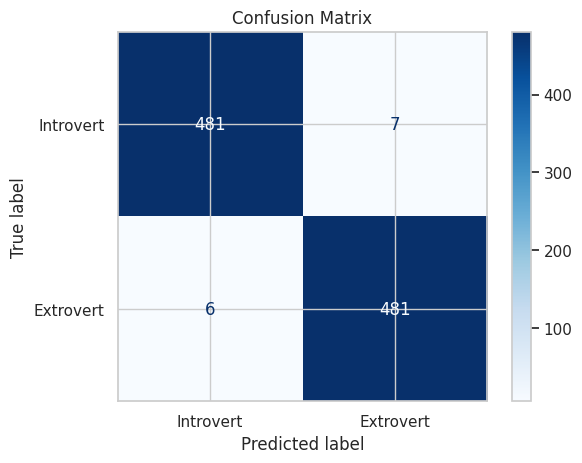

In [81]:
final_model = best_models["Logistic Regression"]
y_test_pred = final_model.predict(X_test_scaled)

# Classification Report
print(" Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Introvert", "Extrovert"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Introvert", "Extrovert"])

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [82]:
pip install xgboost

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

y_train = y_train.astype(int)
y_test = y_test.astype(int)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=20, scoring='accuracy',
                                   cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

print("Best XGBoost Params:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
test_acc = best_xgb.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:57:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best CV Accuracy: 0.9951245844442251
Test Accuracy: 0.9928


In [84]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:57:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [85]:
print("Best XGBoost Params:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best CV Accuracy: 0.9951245844442251


Test Accuracy: 0.9928
Classification Report:
              precision    recall  f1-score   support

   Introvert       0.99      1.00      0.99       488
   Extrovert       1.00      0.99      0.99       487

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



<Figure size 500x400 with 0 Axes>

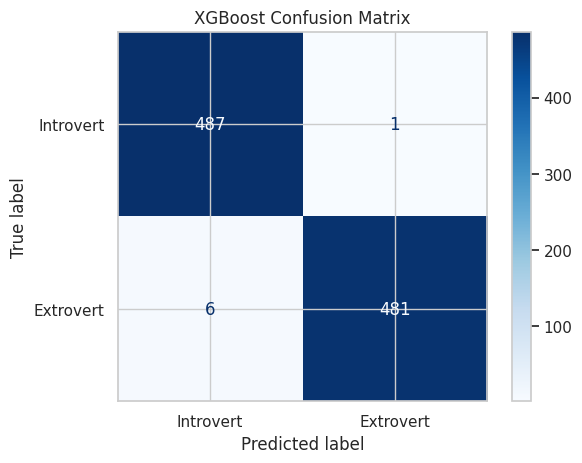

In [86]:
best_xgb = random_search.best_estimator_
y_test_pred = best_xgb.predict(X_test_scaled)

# Accuracy
test_acc = best_xgb.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Introvert", "Extrovert"]))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Introvert", "Extrovert"])

plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

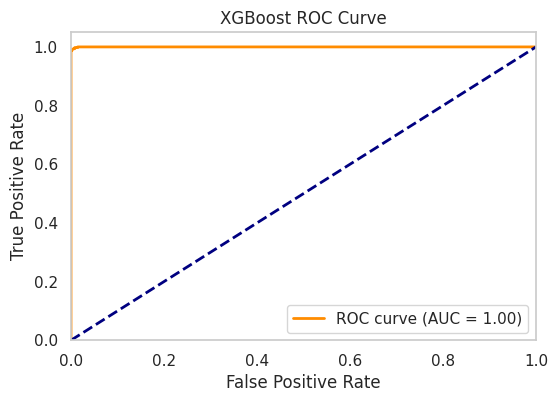

In [87]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
y_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [88]:
print("\n--- Predict Personality Based on User Input ---")
user_input = {}
feature_names = X.columns.tolist()

print("Please enter values for the following features:")

for feature in feature_names:
    while True:
        try:
            # Check if the feature is in the original numerical_cols list
            if feature in ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']:
                value = float(input(f"Enter value for '{feature}': "))
                user_input[feature] = value
                break
            elif feature in ['Stage_fear', 'Drained_after_socializing']:
                 while True:
                    value = input(f"Enter value for '{feature}' (Yes/No): ").strip().capitalize()
                    if value in ['Yes', 'No']:
                        user_input[feature] = value
                        break # Exit inner loop if valid input
                    else:
                        print("Invalid input. Please enter 'Yes' or 'No'.")
                 break # Exit outer loop for categorical input
            else:
                 value = input(f"Enter value for '{feature}': ").strip()
                 user_input[feature] = value
                 break
        except ValueError:
            print("Invalid input. Please enter a valid number.")
user_df = pd.DataFrame([user_input])
user_df = user_df[X.columns]
if 'Stage_fear' in user_df.columns:
    user_df['Stage_fear'] = user_df['Stage_fear'].map({'Yes': 1, 'No': 0})
if 'Drained_after_socializing' in user_df.columns:
    user_df['Drained_after_socializing'] = user_df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
user_df_scaled = scaler.transform(user_df)
prediction = best_xgb.predict(user_df_scaled)
predicted_personality = "Extrovert" if prediction[0] == 1 else "Introvert"

print(f"\nBased on your input, the predicted personality is: {predicted_personality}")


--- Predict Personality Based on User Input ---
Please enter values for the following features:
Enter value for 'Time_spent_Alone': 4
Enter value for 'Stage_fear' (Yes/No): yes
Enter value for 'Social_event_attendance': 2
Enter value for 'Going_outside': 4
Enter value for 'Drained_after_socializing' (Yes/No): yes
Enter value for 'Friends_circle_size': 2
Enter value for 'Post_frequency': 3

Based on your input, the predicted personality is: Extrovert


In [89]:
import joblib
model_to_save = best_xgb

filename = 'personality_predictor_model.joblib'
joblib.dump(model_to_save, filename)

print(f"Model saved to {filename}")
scaler_filename = 'scaler.joblib'
joblib.dump(scaler, scaler_filename)

print(f"Scaler saved to {scaler_filename}")

Model saved to personality_predictor_model.joblib
Scaler saved to scaler.joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')